In [70]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_1samp
import matplotlib.pyplot as plt
from statsmodels.stats.multitest import multipletests

In [7]:
rng = np.random.default_rng(1)
n,m = 20,100
X = pd.DataFrame(rng.normal(size = (n,m)))


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.345584,0.821618,0.330437,-1.303157,0.905356,0.446375,-0.536953,0.581118,0.364572,0.294132,...,0.876242,0.256486,-0.094828,-0.258848,1.055743,-2.250854,-0.138655,0.033000,-1.425349,0.332814
1,-0.651281,0.862445,-0.125592,0.669153,1.218844,0.382930,-0.875721,-1.514319,1.753384,-0.111292,...,-0.459072,1.226271,0.962155,-2.711285,0.041703,-1.617467,1.109638,0.168106,0.548405,-1.065125
2,1.828430,2.020073,-1.064771,0.372815,-0.673302,-0.023570,-1.265637,1.867146,-0.969180,-0.296084,...,-0.875422,1.001410,0.144085,0.782085,0.134622,0.262901,-0.782999,0.668047,1.784698,-0.309688
3,-0.592775,-0.157837,-0.481280,-0.701479,0.138194,-0.290918,1.438874,0.000202,0.323912,0.952022,...,0.681968,0.770631,-0.111646,-0.257662,-0.193803,-1.694992,0.188743,0.234578,-0.865529,0.742446
4,-1.372967,-0.551813,-0.475219,1.987510,-1.599184,0.562630,0.942123,0.377726,1.181808,-1.002738,...,-1.182603,0.162277,1.110292,0.271668,0.172856,-0.379214,0.561030,-2.135831,0.232373,0.028126
5,-1.370340,2.175598,-1.387413,-1.077520,-1.200863,1.110368,-0.888085,0.668656,0.587510,0.259670,...,-3.080178,-0.357138,-0.332090,-1.426456,-1.482503,-0.462462,-0.547100,1.259919,0.374863,-1.580855
6,-0.854651,0.705142,1.895977,0.386499,0.310713,1.860752,-0.022671,-0.309101,-1.413249,-0.513016,...,-1.066791,1.033177,0.465109,0.978769,-0.309761,0.563999,-0.730844,-1.371960,-1.694795,-0.551710
7,-0.548941,-0.629377,-3.548805,-1.998604,-0.532632,0.287017,-0.578793,-0.876897,-2.308473,2.021499,...,-1.219819,-0.265092,0.036187,1.368172,1.776935,-0.694593,-1.180284,-1.783845,1.288723,-0.135994
8,-0.697477,-0.101440,-2.608908,-1.776633,0.883802,0.344033,0.098079,-1.053687,0.535345,1.725905,...,0.345903,-0.592976,-0.352377,-0.504329,2.106537,0.191187,0.049320,-2.166612,0.723810,-1.071496
9,-1.142957,0.599558,-0.876409,0.822835,1.108893,-1.802395,-0.149110,-1.586818,-0.074934,0.899198,...,0.951823,0.577532,-0.354330,-0.213398,-0.359092,-0.338785,-2.418499,-0.076199,-0.397134,0.274956


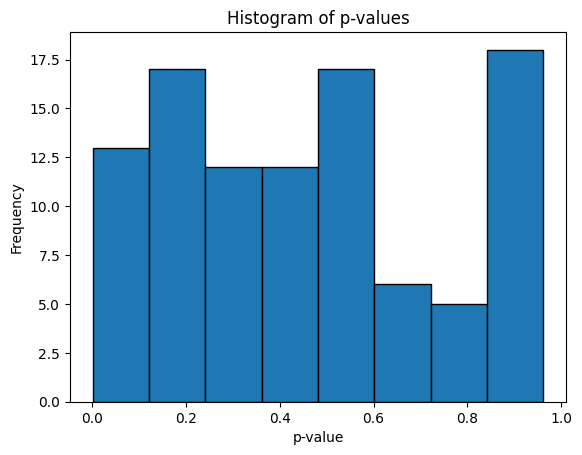

In [66]:
# (a) one-sample t-test for each fund manager
p_value = np.zeros(m)
for idx,col in enumerate(X.columns): 
    test = ttest_1samp(X.iloc[:,col], popmean= 0)
    p_value[idx] = test.pvalue

plt.hist(p_value, bins= 'auto', edgecolor='black', linewidth=1) 
plt.title('Histogram of p-values')
plt.xlabel('p-value')
plt.ylabel('Frequency')
plt.show()

In [69]:
# b If we control Type I error for each null hypothesis at level α = 0.05, then how many null hypotheses do we reject?
h0_reject = p_value < 0.05
print('The number of rejected null hypothesis is', np.sum(h0_reject))

4

In [79]:
# c If we control the FWER at level 0.05, then how many null hypotheses do we reject?
p_adjusted = multipletests(p_value, method = 'bonferroni')
h0_bf_reject = np.sum(p_adjusted[0])
print('The number of rejected null hypothesis is', h0_bf_reject)

The number of rejected null hypothesis is 0


In [80]:
# (d) If we control the FDR at level 0.05, then how many null hypotheses do we reject?
p_fdr_adjusted = multipletests(p_value, method = 'fdr_bh')
h0_fdr_reject = np.sum(p_fdr_adjusted[0])
print('The number of rejected null hypothesis is', h0_fdr_reject)

The number of rejected null hypothesis is 0


In [89]:
# (e) cheery pick 10 fund managers who perform the best and repeat the analysis

best_indices = np.argsort(p_value)[:10]
best_pvalues = p_value[best_indices]
# p_value[best_indices]
# control the FWER
p_subset_adjusted = multipletests(best_pvalues, method = 'bonferroni')
h0_sub_bf_reject = np.sum(p_subset_adjusted[0])
print('The number of rejected null hypothesis after FWER correction is', h0_sub_bf_reject)

# control the FDR
p_subset_adjusted_fdr = multipletests(best_pvalues, method = 'fdr_bh')
h0_sub_fdr_reject = np.sum(p_subset_adjusted_fdr[0])
print('The number of rejected null hypothesis after FDR correction is', h0_sub_fdr_reject)


The number of rejected null hypothesis after FWER correction is 1
The number of rejected null hypothesis after FDR correction is 2


The analysis is misleading because it involves selection bias to include only the most significant observations and reduces the multiple testing while these methods assumes having all hypothesis predefined.